### Machine Learning Algorithms:
- Supervised
- Unsupervised
- Reinforcement

### Supervised Machine Learning Algarithm__
- Regression
    - Linear Regression
    - KNN
    - Decision Tree
    - Bagging(Boot strap aggregation) - Random Forest
    - Boosting Algarithms - XG,ADA
    
- Classification
    - Logisti Regression
    - SVM

#### Life cycle of a data science Project:
1. Data Collection and Visualization
2. Feature Engineering
3. Feature Selection
4. Model Creation
5. Hyper Parameter Optimization

## Linear Regression - Supervised MLA
- A regression problem is about predicting a quantity. A simple example of a regression problem is prediction of the Percentage of marks a student can obtain based on attributes like No of hours he studied.


In [2]:
# Importing all libraries required in this notebook
import pandas as pd
import numpy as np  
import matplotlib.pyplot as plt  
%matplotlib inline


In [4]:
# Importing the dataset
url = 'http://bit.ly/w-data'
data = pd.read_csv(url)
data

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


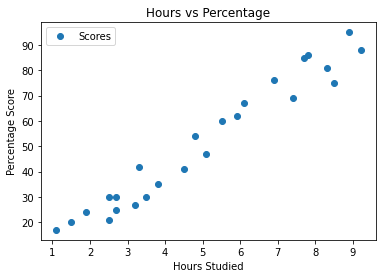

In [6]:
# Plotting the distribution of scores
data.plot(x='Hours', y='Scores', style='o')  
plt.title('Hours vs Percentage')  
plt.xlabel('Hours Studied')  
plt.ylabel('Percentage Score')  
plt.show()

In [8]:
X = data.iloc[:, 0] 
Y = data.iloc[:, 1]  

In [9]:
X[:10]

0    2.5
1    5.1
2    3.2
3    8.5
4    3.5
5    1.5
6    9.2
7    5.5
8    8.3
9    2.7
Name: Hours, dtype: float64

In [10]:
Y[:10]

0    21
1    47
2    27
3    75
4    30
5    20
6    88
7    60
8    81
9    25
Name: Scores, dtype: int64

### Model Building from Scratch

In [11]:
# Building the model
m = 0
c = 0

L = 0.01  # The learning Rate
epochs = 1500  # The number of iterations to perform gradient descent

n = float(len(X)) # Number of elements in X

# Performing Gradient Descent 
for i in range(epochs): 
    Y_pred = m*X + c  # The current predicted value of Y
    D_m = (-2/n) * sum(X * (Y - Y_pred))  # Derivative wrt m
    D_c = (-2/n) * sum(Y - Y_pred)  # Derivative wrt c
    m = m - L * D_m  # Update m
    c = c - L * D_c  # Update c
    
print (m, c)


9.776261224111572 2.4808370478456707


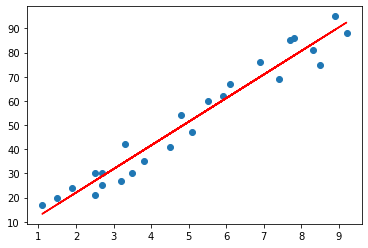

In [12]:
# Making predictions
Y_pred = m*X + c

plt.scatter(X, Y) 
#plt.plot([min(X), max(X)], [min(Y_pred), max(Y_pred)], color='red')  # regression line
plt.plot(X,Y_pred, color='red')
plt.show()

### Using Predefined Models from SKlearn library

In [13]:
X = data.iloc[:, :-1] 
Y = data.iloc[:, 1]  

In [14]:
from sklearn.model_selection import train_test_split  
X_train, X_test, y_train, y_test = train_test_split(X, Y, 
                            test_size=0.2, random_state=0) 

In [15]:
from sklearn.linear_model import LinearRegression  
regressor = LinearRegression()  
regressor.fit(X_train, y_train) 

LinearRegression()

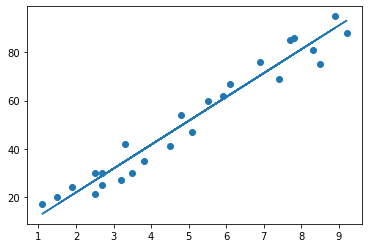

In [16]:
# Plotting the regression line
line = regressor.coef_*X+regressor.intercept_

# Plotting for the test data
plt.scatter(X, Y)
plt.plot(X, line);
plt.show()

### Evaluating the performance of the model

To evaluate how good your regression model is, you can use the following metrics:
There are 3 main metrics for model evaluation in regression:
1. R Square/Adjusted R Square
2. Mean Square Error(MSE)/Root Mean Square Error(RMSE)
3. Mean Absolute Error(MAE)


- R-squared: indicate how many variables compared to the total variables the model predicted. R-squared does not take into consideration any biases that might be present in the data. Therefore, a good model might have a low R-squared value, or a model that does not fit the data might have a high R-squared value.
- Mean Square Error (MSE): good to use if you have a lot of outliers in the data.
- Average absolute error(MAE): similar to the average error, only you use the absolute value of the difference to balance out the outliers in the data.
- Median absolute error: represents the average of the absolute differences between prediction and actual observation. All individual differences have equal weight, and big outliers can therefore affect the final evaluation of the model.

In [17]:
print(X_test) # Testing data - In Hours
y_pred = regressor.predict(X_test) # Predicting the scores

    Hours
5     1.5
2     3.2
19    7.4
16    2.5
11    5.9


In [18]:
# Comparing Actual vs Predicted
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})  
df 

,Actual,Predicted
5,20,16.884145
2,27,33.732261
19,69,75.357018
16,30,26.794801
11,62,60.491033


In [19]:
from sklearn import metrics  
metrics.r2_score(y_test, y_pred)

0.9454906892105356

In [20]:
print('Mean Absolute Error:',
      metrics.mean_absolute_error(y_test, y_pred)) 
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 4.183859899002975
Mean Squared Error: 21.5987693072174
Root Mean Squared Error: 4.6474476121003665


In [21]:
# You can also test with your own data
hours = [[9.25]]
own_pred = regressor.predict(hours)
print("No of Hours = {}".format(hours))
print("Predicted Score = {}".format(own_pred[0]))

No of Hours = [[9.25]]
Predicted Score = 93.69173248737538


### ----------------------------------------------------------------------------------------------------------------------------------------------------------

## Decision Tree 
- Decision Tree is one of the most commonly used, practical approaches for supervised learning. It can be used to solve both Regression and Classification tasks. 

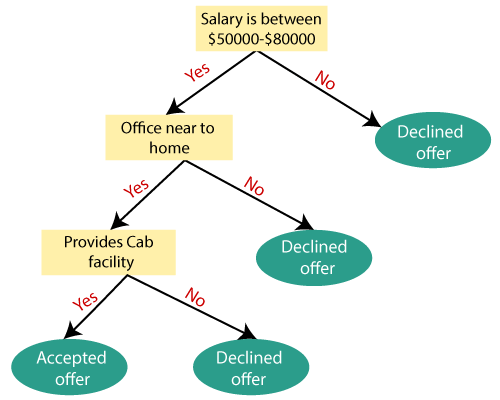

In [22]:
# train the decision tree
from sklearn import tree
dtree = tree.DecisionTreeRegressor()
dtree.fit(X_train, y_train)

DecisionTreeRegressor()

In [23]:
y_pred = dtree.predict(X_test)

In [24]:
dtree.score(X_train, y_train)

0.9990199883182608

In [25]:
# Comparing Actual vs Predicted
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})  
df 

,Actual,Predicted
5,20,17.0
2,27,42.0
19,69,85.0
16,30,21.0
11,62,67.0


In [26]:
metrics.r2_score(y_test, y_pred)

0.6991722188572582

In [27]:
print('Mean Absolute Error:',
      metrics.mean_absolute_error(y_test, y_pred)) 
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 9.6
Mean Squared Error: 119.2
Root Mean Squared Error: 10.917875251164945


In [ ]:
# You can also test with your own data
hours = [[9.25]]
own_pred = dtree.predict(hours)
print("No of Hours = {}".format(hours))
print("Predicted Score = {}".format(own_pred[0]))

## Random Forest

In [28]:
from sklearn.ensemble import RandomForestRegressor
reg_rf = RandomForestRegressor()
reg_rf.fit(X_train, y_train)

RandomForestRegressor()

In [29]:
y_pred = reg_rf.predict(X_test)

In [30]:
reg_rf.score(X_train, y_train)

0.9906799264569456

In [31]:
print(X_test) # Testing data - In Hours
y_pred = reg_rf.predict(X_test) # Predicting the scores

    Hours
5     1.5
2     3.2
19    7.4
16    2.5
11    5.9


In [32]:
# Comparing Actual vs Predicted
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})  
df 

,Actual,Predicted
5,20,19.875000
2,27,37.216667
19,69,84.920000
16,30,23.560833
11,62,63.730000


In [33]:
metrics.r2_score(y_test, y_pred)

0.7969422218156224

In [34]:
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))
print('MSE:', metrics.mean_squared_error(y_test, y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

MAE: 6.886166666666666
MSE: 80.4596140277778
RMSE: 8.969928317872881


In [35]:
# You can also test with your own data
hours = [[9.25]]
own_pred = reg_rf.predict(hours)
print("No of Hours = {}".format(hours))
print("Predicted Score = {}".format(own_pred[0]))

No of Hours = [[9.25]]
Predicted Score = 89.26
